# Deflexión de una membrana

Queremos calcular la deflexión $D(x,y)$ de una membrana circular bidimensional de radio $R$, sujeta a una carga $p$ sobre la membrana. El modelo PDE apropiado es $$-T\nabla^2D = p \quad in \quad 
 \Omega = \{(x,y)|x^2+y^2\leq R\}.$$ Aquí, $T$ es la tensión en la membrana (constante) y $p$ es la carga de presión externa. El límite de la membrana no tiene deflexión, lo que implica que $D=0$ es una condición límite. Una carga localizada se puede modelar como una función gaussiana (ver pag. 31).

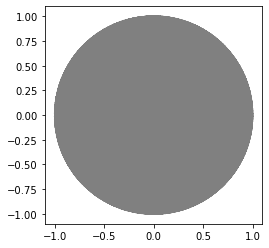

In [13]:
#definiendo la malla
from fenics import *
from mshr import *
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
plot(mesh)

La forma Circle de mshr toma el centro y el radio del círculo como argumentos. El segundo argumento de la función generate_mesh especifica la resolución de malla deseada. El tamaño de la celda será (aproximadamente) igual al diámetro del dominio dividido por la resolución.

In [19]:
V = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
w_D = Constant(0)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

In [20]:
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',degree=1, beta=beta, R0=R0)

Las coordenadas en los objetos Expression son siempre una matriz x con componentes $x[0]$, $x[1]$ y $x[2]$, correspondientes a $x$, $y$ y $z$. De lo contrario, somos libres de introducir nombres de parámetros siempre que estos tengan valores predeterminados mediante argumentos de palabras clave. Todos los parámetros inicializados por argumentos de palabra clave pueden modificar sus valores en cualquier momento. Por ejemplo, podemos establecer

In [15]:
p.beta = 12
p.R0 = 0.3

In [21]:
#Definiendo y resolviendo


w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx
w = Function(V)
solve(a == L, w, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


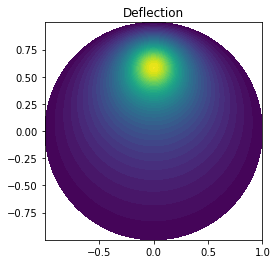

In [23]:
# Plot solution
p = interpolate(p, V)
plot(w, title='Deflection')
plot(p, title='Load')

Otra forma de comparar la deflexión y la carga es trazar una curva a lo largo de la línea x = 0. Esto es solo cuestión de definir un conjunto de puntos a lo largo del eje y y evaluar las funciones de elementos finitos w y p en estos puntos :

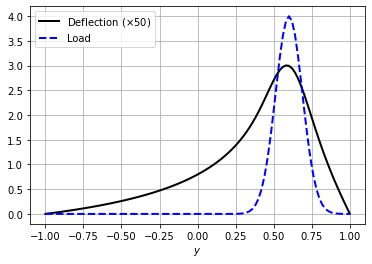

In [24]:
# Curve plot along x = 0 comparing p and w
import numpy as np
import matplotlib.pyplot as plt
tol = 0.001  # avoid hitting points outside the domain
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y]  # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, 'k', linewidth=2)  # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')